### Importing Libraries

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

### Visualising input image

In [100]:
image = cv.imread('outdoor1.webp')

cv.imshow('input',image)
cv.waitKey(0)
cv.destroyAllWindows()

## K-means clustering

In [40]:
img = cv.imread('outdoor1.webp')
pixel_vals = img.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

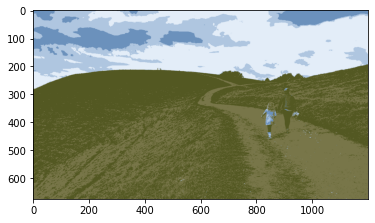

In [44]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially chosed for k-means clustering
k = 5
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))
segmented_image = cv.cvtColor(segmented_image,cv.COLOR_BGR2RGB)
plt.imshow(segmented_image)


## Grabcut

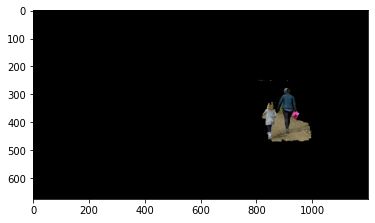

(<matplotlib.image.AxesImage at 0x7f3f2e4e6320>, None)

In [129]:
img = cv.imread('outdoor1.webp')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (800,250,200,220)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

img = img*mask2[:,:,np.newaxis]
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img),plt.show()

In [75]:
img.shape

(280, 390, 3)

## Active contours

/home/yash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  


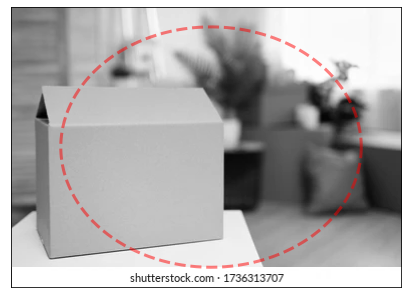

In [66]:
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = cv.imread('boxINbackground.webp')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

s = np.linspace(0, 2*np.pi, 400)
r = 140 + 120*np.sin(s)
c = 200 + 150*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=0.1, gamma=0.001, w_edge=1, w_line=0)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3,alpha = 0.5)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

In [65]:
snake

array([[ 158.20045311, 2849.95668034],
       [ 158.96060154, 2849.9412886 ],
       [ 159.68075602, 2849.88835575],
       [ 160.36271251, 2849.79798131],
       [ 161.00794866, 2849.67023354],
       [ 161.61771515, 2849.50516725],
       [ 162.19322033, 2849.30283587],
       [ 162.73581966, 2849.06329612],
       [ 163.24715172, 2848.78660845],
       [ 163.72922482, 2848.47283784],
       [ 164.18445209, 2848.12205611],
       [ 164.61564549, 2847.73434366],
       [ 165.0259694 , 2847.30978947],
       [ 165.4189142 , 2846.84848979],
       [ 165.7981952 , 2846.35054652],
       [ 166.16771188, 2845.81606595],
       [ 166.5314584 , 2845.24515779],
       [ 166.89344038, 2844.63793377],
       [ 167.25760445, 2843.99450511],
       [ 167.62776516, 2843.31497801],
       [ 168.00750814, 2842.59944839],
       [ 168.40010261, 2841.84799993],
       [ 168.80845554, 2841.06070984],
       [ 169.23499335, 2840.23766292],
       [ 169.68167911, 2839.37896668],
       [ 170.15002156, 28

/home/yash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  


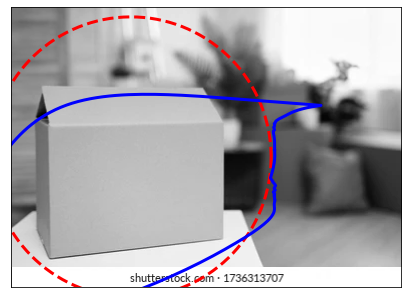

In [110]:
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = cv.imread('boxINbackground.webp')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

s = np.linspace(0, 2*np.pi, 400)
r = 150 + 140*np.sin(s)
c = 120 + 140*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001, w_edge=5, w_line=5)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

## Watershed

In [37]:
img = cv.imread('boxONtable.webp')

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

_,thresh = cv.threshold(gray,200,255,cv.THRESH_BINARY)

cv.imshow('thresholded',thresh)
cv.waitKey(0)
cv.destroyAllWindows()

In [45]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 3)

sure_fg = cv.dilate(opening,kernel,iterations = 6)
cv.imshow('cleaned',sure_fg)
cv.waitKey(0)
cv.destroyAllWindows()

In [46]:
mask = np.dstack((sure_fg,sure_fg,sure_fg))
masked = img*(mask/255)

masked = np.uint8(masked)
cv.imshow('masked',masked)
cv.waitKey(0)
cv.destroyAllWindows()

In [47]:
_,thresh2 = cv.threshold(gray,120,255,cv.THRESH_BINARY)

cv.imshow('thresholded',thresh2)
cv.waitKey(0)
cv.destroyAllWindows()

In [50]:
# noise removal
sure_bg = cv.dilate(thresh2,kernel,iterations=1)

cv.imshow('sure background',sure_bg)
cv.waitKey(0)
cv.destroyAllWindows()

In [51]:
mask = np.dstack((sure_bg,sure_bg,sure_bg))
masked = img*(mask/255)

masked = np.uint8(masked)
cv.imshow('masked',masked)
cv.waitKey(0)
cv.destroyAllWindows()

In [52]:
sure_fg = np.uint8(opening)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

markers[unknown==255] = 0

In [53]:
markers = cv.watershed(img,markers)
img[markers == -1] = [0,0,255]

cv.imshow('segmented',img)
cv.waitKey(0)
cv.destroyAllWindows()

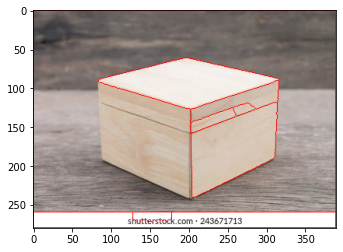

(<matplotlib.image.AxesImage at 0x7f3f5858c5c0>, None)

In [54]:
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img),plt.show()